# Airbnb Data Analysis - Bangkok
Airbnb is the biggest hotel franchise in the world, the interesting part about it is that they have no hotels at all!

Through an innovative way of finding accommodation, Airbnb connects people who want to travel (and to accommodate somewhere) to house hosts who want to rent their places.

Since it began in 2008, Airbnb has skyrocketed in popularity as an alternative to hotels. The online hospitality service is a marketplace for authentic places to stay that connects travelers to local hosts.

*   According to our data analysis there are 2.9 million hosts on Airbnb worldwide in 2021. 
*   14,000 new hosts are joining the platform each month in 2021.
*   There are over 7 million listings on Airbnb worldwide in 2021.
*   There are 100,000 cities with active Airbnb listings in 2021.
*   There are 220 countries and regions with active Airbnb listings in 2021.

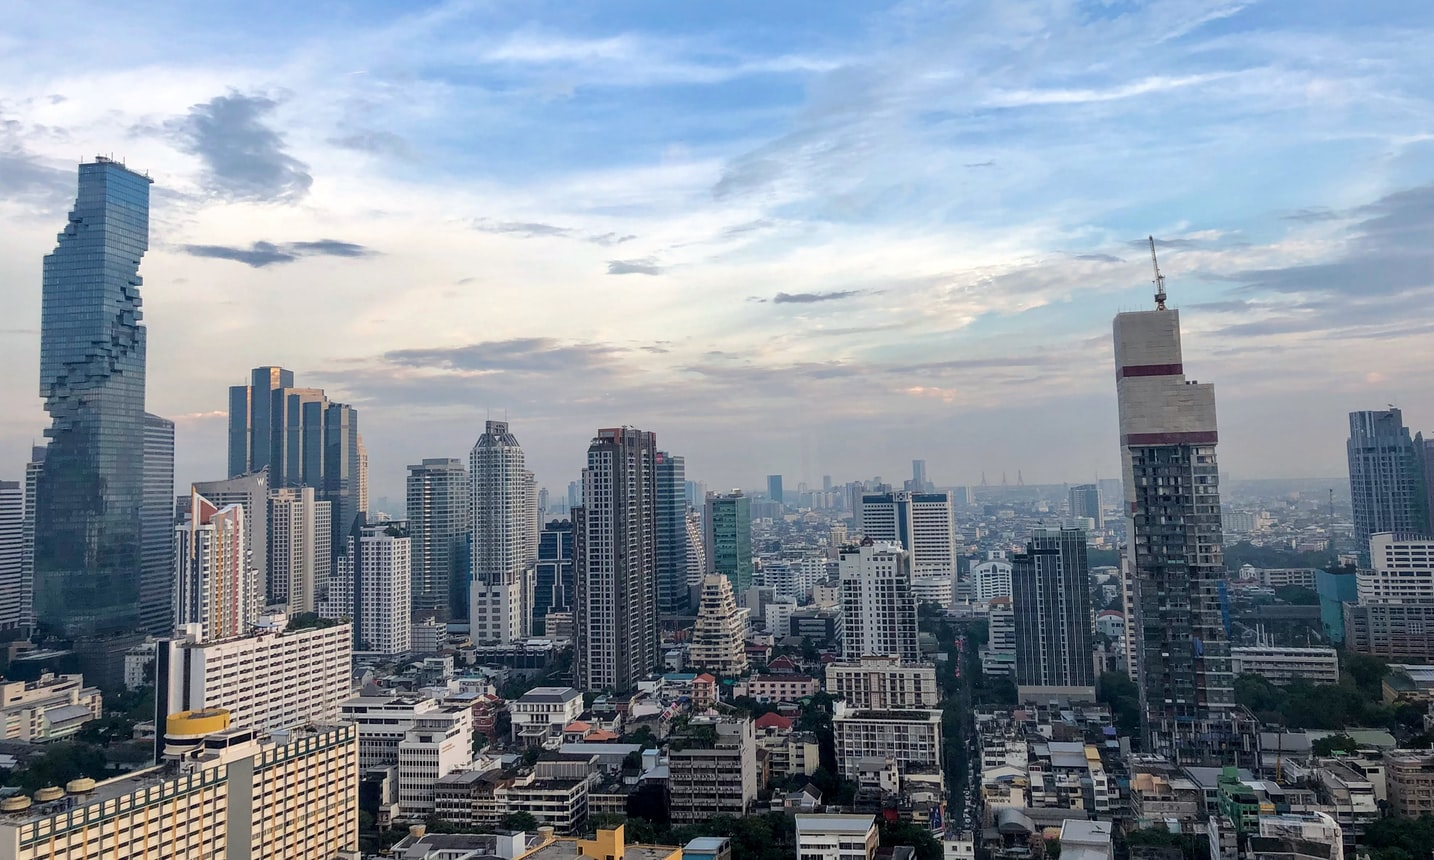

**Largest City in Thailand**
Bangkok is by far the largest city in Thailand. In fact, its roughly 8.2 million population is close to 13% of the entire population of Thailand. Even if the city does seem horrendously busy and overcrowded, bear in mind that Bangkok is relatively small (population-wise) when compared to other major cities of the world. It currently ranks 24th largest, behind the likes of Moscow, New York City, Shanghai, and Beijing.

**One of the World’s Most Popular Cities**
Of course, the population of Bangkok is the number of people who live there full time, but what about all the visitors who come to Bangkok every year? Add these to the permanent population and you start to understand why the city is so busy! Bangkok is one of the world’s most popular cities, attracting more tourists each year than even Paris. Exact numbers vary according to who you ask, but it’s somewhere in the region of 15 million visitors per year.

In addition to this, the startup also has a culture of handling free data on the internet, you can download them from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) and have access to data from some of the biggest cities in the world, which allows you to build countless projects and Data Science solutions.

#Obtaining the Data
We will be using four libraries to analyze our dataset, these are:

1. `pandas` - Used to manipulate our dataset.

2. `matplotlib` - Used to plot our histograms.

3. `seaborn` - Used to plot our heatmap.

4. `plotly` - Used to plot our interactive map.

Let's begin by importing the three first packages, and setting our dataset as the variable `df` which stands for DataFrame. `Pandas` is the responsible for reading and editing our file.

By the way, we will import `plotly` later.

In [66]:
# importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
from google.colab import files
uploaded = files.upload()

Saving Bangkok.csv to Bangkok (1).csv


In [69]:
# importing the file to a DataFrame
df = pd.read_csv('Bangkok.csv')

In [70]:
df.shape

(19289, 16)

#Analysis of the data
Variables dictionary

* `id` - the id number generate to identify the place.
* `name` - name of the place announced.
* `host_id` - the id number of the place's host.
* `host_name` - host's name.
* `neighbourhood_group` - this column has no valid data.
* `neighbourhood` - neighbourhood's name.
* `latitude` - property's latitude coordinate.
* `longitude` - property's longitude coordinate.
* `room_type` - type of room offered.
* `price` - price to rent the place.
* `minimum_nights` - minimum amount of nights to book the place.
* `number_of_reviews` - amount of reviews the place has.
* `last_review` - last review's date.
* `reviews_per_month` - amount of reviews per month.
* `calculated_host_listings_count` - amount of properties the host owns.
* `availability_365` - amount of available days in a year.

Before starting any analyzation, let's check out our dataset by having a look at the first 5 entrances.

In [71]:
# shows the first 5 entrances
df.head()

id  ... availability_365
0  27934  ...              362
1  27942  ...                0
2  27979  ...                1
3  28354  ...              364
4  28745  ...              365

[5 rows x 16 columns]

##Q1. How many variables and entrances our dataset has? What are their types?

In [72]:
# identifying the size of the dataset
print('Values:\t {}'.format(df.shape[0]))
print('Variables:\t {}'.format(df.shape[1]))

# verifying the type of each column
display(df.dtypes)

Values:	 19289
Variables:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Q2. What percentage of values are missing in the dataset?
It's always important to check how many values are missing in our dataset, depeding on how many are missing they may impact a lot in our results.

* We can see that the `neighbourhood_type` column has 100% of its values missing.
* The variables `reviews_per_month` and `last_review` have around 41% of their values empty.
* `host_name` and `name` have almost 3, 0.04% of their values empty.

In [73]:
# ordenating variables with the highest amount of null values in descending order
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  41.121883
last_review                        41.121883
host_name                           3.846752
name                                0.046659
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

##Q3. How are the variables distributed?
In order to check how variables are distributed, I will plot histograms, this is a way to identify possible outliers that can trouble our results.

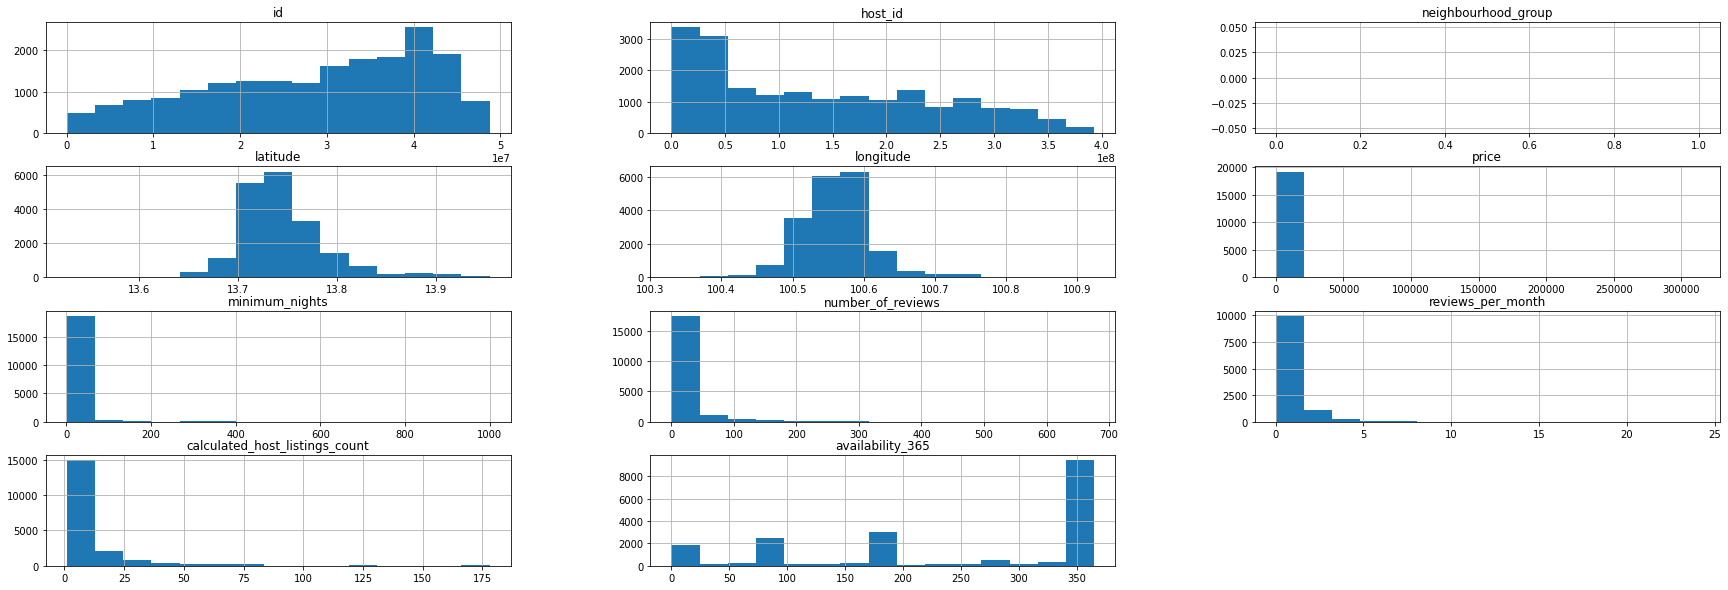

In [74]:
# plot the histogram of the numerical variables
df.hist(bins=15, figsize=(30,10));

##Q4. Finding the outliers
If you take a look at the distribution of the histograms, you may notice the existence of outliers in variables like `price`, `minimum_nights` and `calculated_host_listings_count`.

These values don't follow the distribution and they also mess up the whole graphical representation. There are two quick ways that help us identify the existence of outliers. These are:

* Statistical summary using the `.describe()` function.
* Plotting box plots for the variables.

In [75]:
# statistical summary of the variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', "availability_365"]].describe()

price  ...  availability_365
count   19289.000000  ...      19289.000000
mean     2094.471201  ...        244.057857
std      6444.398622  ...        133.917459
min         0.000000  ...          0.000000
25%       701.000000  ...        107.000000
50%      1100.000000  ...        332.000000
75%      1900.000000  ...        365.000000
max    312839.000000  ...        365.000000

[8 rows x 6 columns]

By analyzing the statitiscal summary, we can affirm:
* The variable ``price`` has 75% of its values below 1900, however its maximum value is 312839.
* The amount of ``minimum_nights`` surpass 365 days a year.

###Boxplot for price
You can see below how scattered some dots are from the majority. They certainly are outliers and might be messing our results.

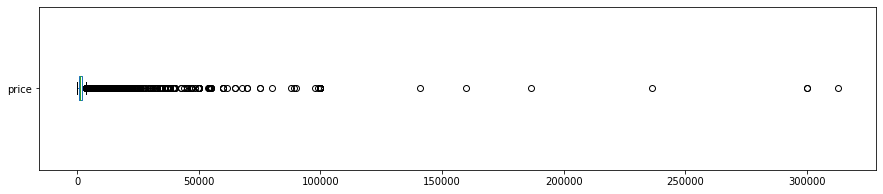

In [76]:
# price box plot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# checking the amount of values over 50000 in the price column
# print("\nprice: values over 50000")
# print("{} entrances".format(len(df[df.price >50000])))
# print('{:.4f}%'.format((len(df[df.price > 50000]) / df.shape[0])*100))

####1. Interquartile Range (IQR)

In [ ]:
# Calculate Q1(25 percentile) & Q3(75 percentile) for price column
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
# Calculate "IQR" for price column
IQR = Q3 - Q1
#Interquartile range 
print(IQR)

In [ ]:
Upper_Limit1 = Q3 + 1.5*IQR
Lower_Limit1 = Q1 - 1.5*IQR
print(f"Upper Limit : {Upper_Limit1}")
print(f"Lower Limit : {Lower_Limit1}")

In [ ]:
outliers1 = df["price"][(df["price"]>Upper_Limit1 ) | (df["price"] < Lower_Limit1)]
print(f"Outliers in price column : \n{outliers1}\n")
print(f"Number of Outliers : {outliers1.shape[0]}")

####2. DBSCAN

In [77]:
# Import DBSCAN library
from sklearn.cluster import DBSCAN

# Convert price column to array with shape (-1,1) 
datascan1 = df["price"].values.reshape(-1,1)

print(f"Shape of data : {datascan1.shape}")
print(f"Type of data : {type(datascan1)}")

# Create DBSCAN model with parameters
modelscan1 = DBSCAN(eps=0.5,min_samples=8)

# Fit model to data
modelscan1.fit(datascan1)

# Printing total number of outliers
print(f"Total number of outliers : {sum(modelscan1.labels_ == -1)}")

# Outliers 
outliersscan1 = df["price"][modelscan1.labels_ == -1]
print(f"Outliers in price column : \n{outliersscan1}")

outliersscan11 = outliersscan1.index.tolist()

Shape of data : (19289, 1)
Type of data : <class 'numpy.ndarray'>
Total number of outliers : 5008
Outliers in price column : 
0        1694
5        4619
7        1720
9         541
12        649
         ... 
19272    2722
19274     996
19280    1062
19286     256
19288    1045
Name: price, Length: 5008, dtype: int64


####3. Isolation Forest

In [ ]:
# Import Isolation Forest library
from sklearn.ensemble import IsolationForest

# Convert price column to array with shape (-1,1) 
dataforest1 = df["price"].values.reshape(-1,1)

print(f"Shape of data : {dataforest1.shape}")
print(f"Type of data : {type(dataforest1)}")

# Create IsolationForest model with parameters
modelforest1 = IsolationForest(contamination=0.001,n_estimators= 500)

# Fit model to data
modelforest1.fit(dataforest1)

# predictions (label -1 represents outliers)
predictionforest1 = modelforest1.predict(dataforest1)

# Printing total number of outliers                      
print(f"Total number of outliers : {sum(predictionforest1 == -1)}")

# Outliers 
outliersforest1 = df["price"][predictionforest1 == -1]
print(f"Outliers in price column : \n{outliersforest1}")

outliersforest11 = outliersforest1.index.tolist()

###Boxplot for minimum_nights
Let's have a look at how distributed the minimum_nights is:

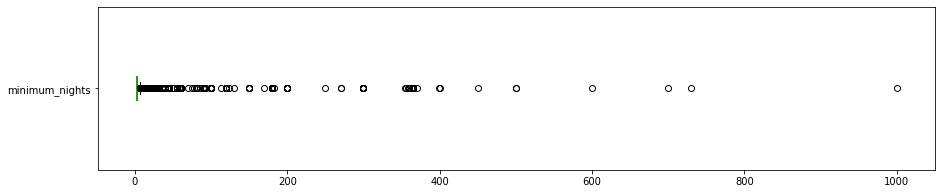

In [78]:
#minimum_nights box plot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# checking amount of values over 200 days in minimum_nights column
# print("minimum_nights: values over 200:")
# print('{} entrances'.format(len(df[df.minimum_nights > 200])))
# print('{:.4f}%'.format((len(df[df.minimum_nights > 200]) / df.shape[0])*100))

####1. Interquartile Range (IQR)

In [ ]:
# Calculate Q1(25 percentile) & Q3(75 percentile) for minimum_nights column
Q1u = df["minimum_nights"].quantile(0.25)
Q3u = df["minimum_nights"].quantile(0.75)
# Calculate "IQR" for minimum_nights column
IQRu = Q3u - Q1u
#Interquartile range 
print(IQRu)

In [ ]:
Upper_Limit2 = Q3u + 1.5*IQRu
Lower_Limit2 = Q1u - 1.5*IQRu
print(f"Upper Limit : {Upper_Limit2}")
print(f"Lower Limit : {Lower_Limit2}")

In [ ]:
outliers2 = df["minimum_nights"][(df["minimum_nights"] > Upper_Limit2) | (df["minimum_nights"] < Lower_Limit2)]
print(f"Outliers in minimum_nights column : \n{outliers2}\n")
print(f"Number of Outliers : {outliers2.shape[0]}")

####2. DBSCAN

In [79]:
# Import DBSCAN library
from sklearn.cluster import DBSCAN

# Convert Height column to array with shape (-1,1) 
datascan2 = df["minimum_nights"].values.reshape(-1,1)

print(f"Shape of data : {datascan2.shape}")
print(f"Type of data : {type(datascan2)}")

# Create DBSCAN model with parameters
modelscan2 = DBSCAN(eps=0.5,min_samples=8)

# Fit model to data
modelscan2.fit(datascan2)

# Printing total number of outliers
print(f"Total number of outliers : {sum(modelscan2.labels_ == -1)}")

# Outliers 
outliersscan2 = df["minimum_nights"][modelscan2.labels_ == -1]
print(f"Outliers in minimum_nights column : \n{outliersscan2}")

outliersscan22 = outliersscan2.index.tolist()

Shape of data : (19289, 1)
Type of data : <class 'numpy.ndarray'>
Total number of outliers : 100
Outliers in minimum_nights column : 
38       358
54       200
59       200
251      250
262       22
        ... 
18681     35
18930     22
18934     89
19034     19
19087    400
Name: minimum_nights, Length: 100, dtype: int64


####3. Isolation Forest

In [ ]:
# Import Isolation Forest library
from sklearn.ensemble import IsolationForest

# Convert minimum_nights column to array with shape (-1,1) 
dataforest2 = df["minimum_nights"].values.reshape(-1,1)

print(f"Shape of data : {dataforest2.shape}")
print(f"Type of data : {type(dataforest2)}")

# Create IsolationForest model with parameters
modelforest2 = IsolationForest(contamination=0.001,n_estimators= 500)

# Fit model to data
modelforest2.fit(dataforest2)

# predictions (label -1 represents outliers)
predictionforest2 = modelforest1.predict(dataforest2)

# Printing total number of outliers                      
print(f"Total number of outliers : {sum(predictionforest2 == -1)}")

# Outliers 
outliersforest2 = df["minimum_nights"][predictionforest2 == -1]
print(f"Outliers in minimum_nights column : \n{outliersforest2}")

outliersforest22 = outliersforest2.index.tolist()

### removing outliers

Since we identified outliers both in ``price`` and ``minimum_nights`` let's clean our *DataFrame* and plot those histograms again.

####1. Interquartile Range (IQR)

In [ ]:
#removing outliers in a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[(df["price"] > Upper_Limit1) | (df["price"] < Lower_Limit1)].index, axis=0, inplace=True)
df_clean.drop(df_clean[(df["minimum_nights"] > Upper_Limit2) | (df["minimum_nights"] < Lower_Limit2)].index, axis=0, inplace=True)

#removing neighbourhood_group, because it's empty
df_clean.drop("neighbourhood_group", axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(15,15));

df_clean.shape

There we go, now we got a clean DataFrame, so we can analyze the true data.

####2. DBSCAN

(14206, 15)

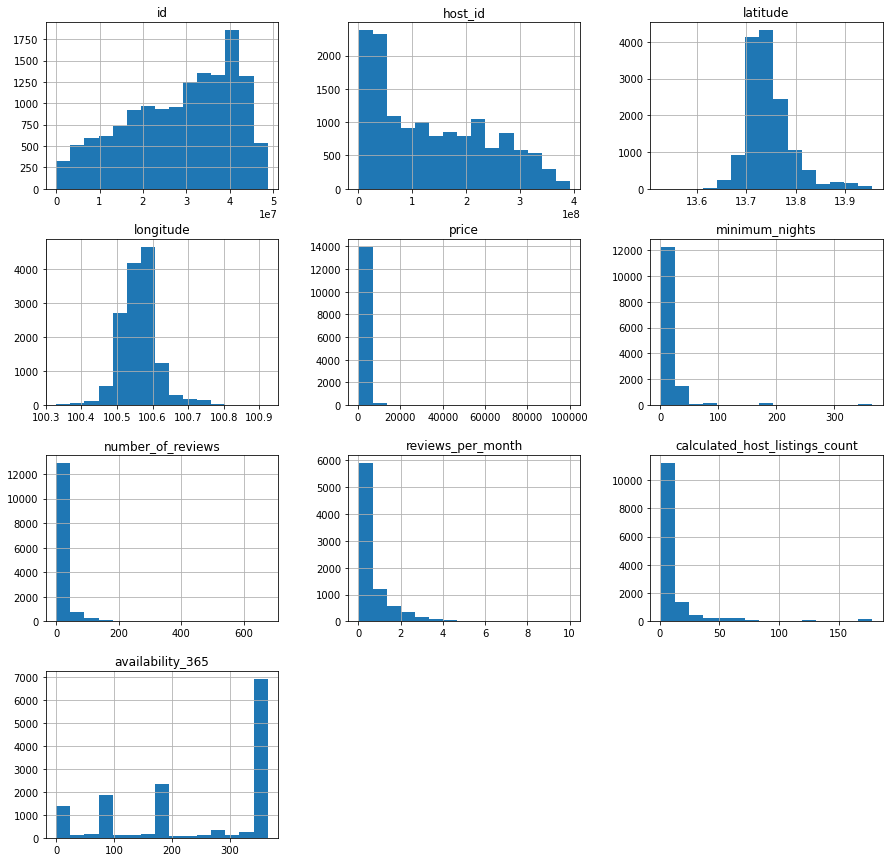

In [80]:
#removing outliers in a new DataFrame
df_clean2 = df.copy()

outliersscan = outliersscan11 + outliersscan22
outliersscan = list(dict.fromkeys(outliersscan))

df_clean2.drop(outliersscan, axis=0, inplace=True)

#removing neighbourhood_group, because it's empty
df_clean2.drop("neighbourhood_group", axis=1, inplace=True)

df_clean2.hist(bins=15, figsize=(15,15));

df_clean2.shape

####3. Isolation Forest

In [ ]:
#removing outliers in a new DataFrame
df_clean3 = df.copy()

outliersforest = outliersforest11 + outliersforest22
outliersforest = list(dict.fromkeys(outliersforest))

df_clean3.drop(outliersforest, axis=0, inplace=True)

#removing neighbourhood_group, because it's empty
df_clean3.drop("neighbourhood_group", axis=1, inplace=True)

df_clean3.hist(bins=15, figsize=(15,15));

df_clean3.shape

##Q5. What's the average renting price??
Now that we have a clean DataFrame, we can check our average booking price. To do this we can use the ``.mean()`` method, in which will print the mean value among all the values in the price column.

In [81]:
# Average of the price column
df_clean2.price.mean()

1479.1423342249755

##Q6. What are the correlations among the variables?
Correlation means that two (or more) variables are connected in a certain way. We are looking for connections and similarities between two variables.

These connections can be measured and the correlation coefficient will tell us how connected/related they are.

In order to find connections, let's...
* make a correlation matrix.
* plot a ``heatmap`` using the matrix data, by using the ``seaborn`` library.

In [83]:
# making a correlation matrix
corr = df_clean2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 "calculated_host_listings_count", 'availability_365']].corr()

# showing the correlation matrix
display(corr)

price  ...  availability_365
price                           1.000000  ...          0.005946
minimum_nights                  0.024338  ...          0.052717
number_of_reviews              -0.011318  ...          0.019613
reviews_per_month               0.008830  ...         -0.034396
calculated_host_listings_count -0.044785  ...          0.116769
availability_365                0.005946  ...          1.000000

[6 rows x 6 columns]

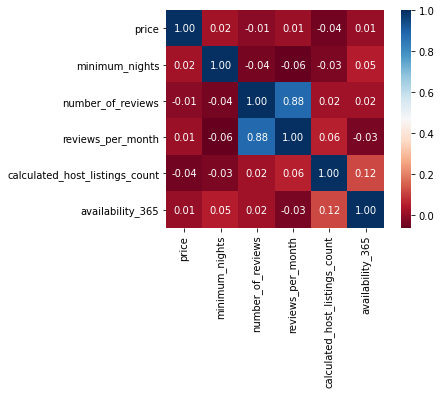

In [84]:
#plotitng the heatmap with the matrix data
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

Blue means related, and the "red" it gets means there are less connections. There isn't any major relation in our DataFrame, except for ``reviews_per_month`` and the ``number_of_reviews``.

By the way, all the ``1.00`` values in the heat-map don't mean anything since they are being compared to themselves, for example: ``availability_365`` to ``availability_365``.

##Q7. What type of places are rented the most in Bangkok?
The column `room_type` contains all the kind of places you can rent in Airbnb, there are quite a few options available.

Let's use the `value.counts()` method to check which is the most popular type of Airbnb property renting in Bangkok.

In [85]:
# shows the amount of each type of place in the dataset
df_clean2.room_type.value_counts()

Entire home/apt    7367
Private room       5514
Hotel room          741
Shared room         584
Name: room_type, dtype: int64

In [86]:
# shows the percentage of each type of place in the dataset
df_clean2.room_type.value_counts() / df_clean2.shape[0] * 100

Entire home/apt    51.858370
Private room       38.814585
Hotel room          5.216106
Shared room         4.110939
Name: room_type, dtype: float64

**Most popular Airbnb booking in Bangkok:**  

1. Entire home/apartment - 51.8%
2.   Private Room - 38.8%
3.   Hotel Room - 5.2%
4.   Shared room - 4.1%

##Q8. What is the most expensive location in Bangkok?
One way to check one variable against another is to use groupby(). In this case, we want to compare neighbourhoods from the rental price

In [87]:
#check average price per neighbourhood
df_clean2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Parthum Wan        2103.896970
Khlong Sam Wa      2090.096774
Sathon             1965.478852
Lat Phrao          1932.275862
Nong Chok          1889.625000
Taling Chan        1862.107143
Bang Bon           1830.200000
Bang Khun thain    1779.090909
Saphan Sung        1745.390244
Yan na wa          1744.539474
Name: price, dtype: float64

In this case, we have that Parthum Wan is the most expensive area in Bangkok to book an Airbnb, followed by Khlong Sam Wa and Sathon, and although this is accurate and these are affluent regions in Bangkok, sometimes representative data may be misleading. In some cases, you have to **take into consideration the number of places available for booking**. The fewer there is, the higher the mean could get. However, **acually**, Sukhumvit, Ploenchit-Wireless, Silom-Sathon and the others are expensive areas in Bangkok. In addition, **outliers** are the factors that we should considered of.

#Maps
By the way, since we are provided with latitude and longitude, we can plot a distribution map. Let ``x=longitude`` and ``y=latitude``.

The redder it gets, it means it is more expensive.

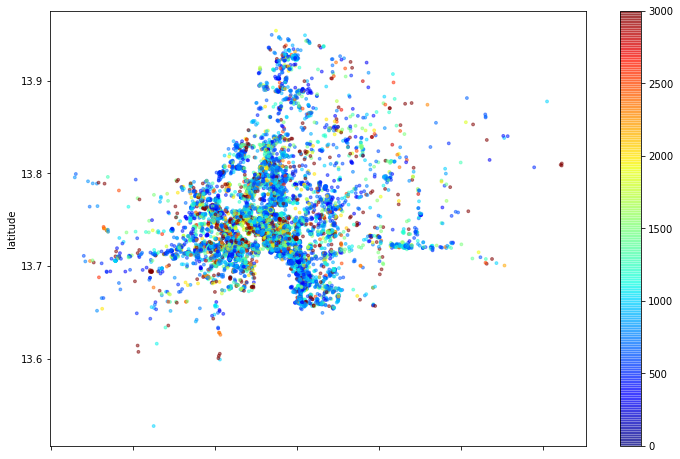

In [96]:
# plot places available for booking by longitude-latitude
df_clean2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df_clean2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8), vmin=0, vmax=3000);

Now let's plot an interactive map with all the locations available in our dataset. By the way, this next map has no filter for price, it is just showing the distribution in Bangkok.

To plot the map I will import the library ``plotly``.

In [97]:
#importing plotly
import plotly.express as px

#plotting our map
fig = px.scatter_mapbox(df_clean2, lat="latitude", lon="longitude", hover_name="name",
                        color_discrete_sequence=["red"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

As you can see, Bangkok is big and full of places available for booking.

##Q7. What's the average of minimum nights in Bangkok? (minimum_nights)
We can also check the average of minimum nights required for booking in Bangkok. To do this we can use the ``.mean()`` method.

Since we are talking about days, I will round it to the nearest tenth.

In [98]:
# checking the mean of column 'minimum_nights'
print('Average of minimum nights:', round(df_clean2['minimum_nights'].mean()))
print('Standard Deviation:', df_clean2['minimum_nights'].std())

Average of minimum nights: 10
Standard Deviation: 34.3792179880063


Isn't it weird to have an average of minimum nights equals to 10? It is. That's a lot of nights, even more than one week. That's why I checked the Standard Deviation of ``minimum_nights``, it returned almost 34, which is pretty high, if you don't know statistics, [Standard Deviation](https://www.youtube.com/watch?v=MRqtXL2WX2M) is basically a statistic that measures the dispersion of a dataset relative to its mean.

To deal with this let's make a copy of ``df_clean2`` called ``df_new`` just so we don't mess up with our original data and then just check the mean for values smaller than 34 days:

In [101]:
df_new = df_clean2.copy()
df_new = df_new[df_new['minimum_nights'].values < 34]
df_new['minimum_nights'].mean()

5.307046979865772

As you can see, the average of minimum nights that the hosts are asking in Bangkok is **5 nights**.

# Conclusions

As we come to an end, we learned that data isn't always perfect. We had lots of missing values that had to be cleaned since they turned out to be outliers, making our results and outputs differ a lot from the reality before we cleaned them.

We also learned that sometimes the outputs are misleading and non-representative, causing the data to be distorted.

Even though we had great insights, this is just a summarized version of the real dataset. In order to truly explore the data, it would be great to have the full version of this csv which holds way more variables and attributes.

By the way, Bangkok is a great city, I highly encourage you to visit, don't forget to buy some Pad thai.

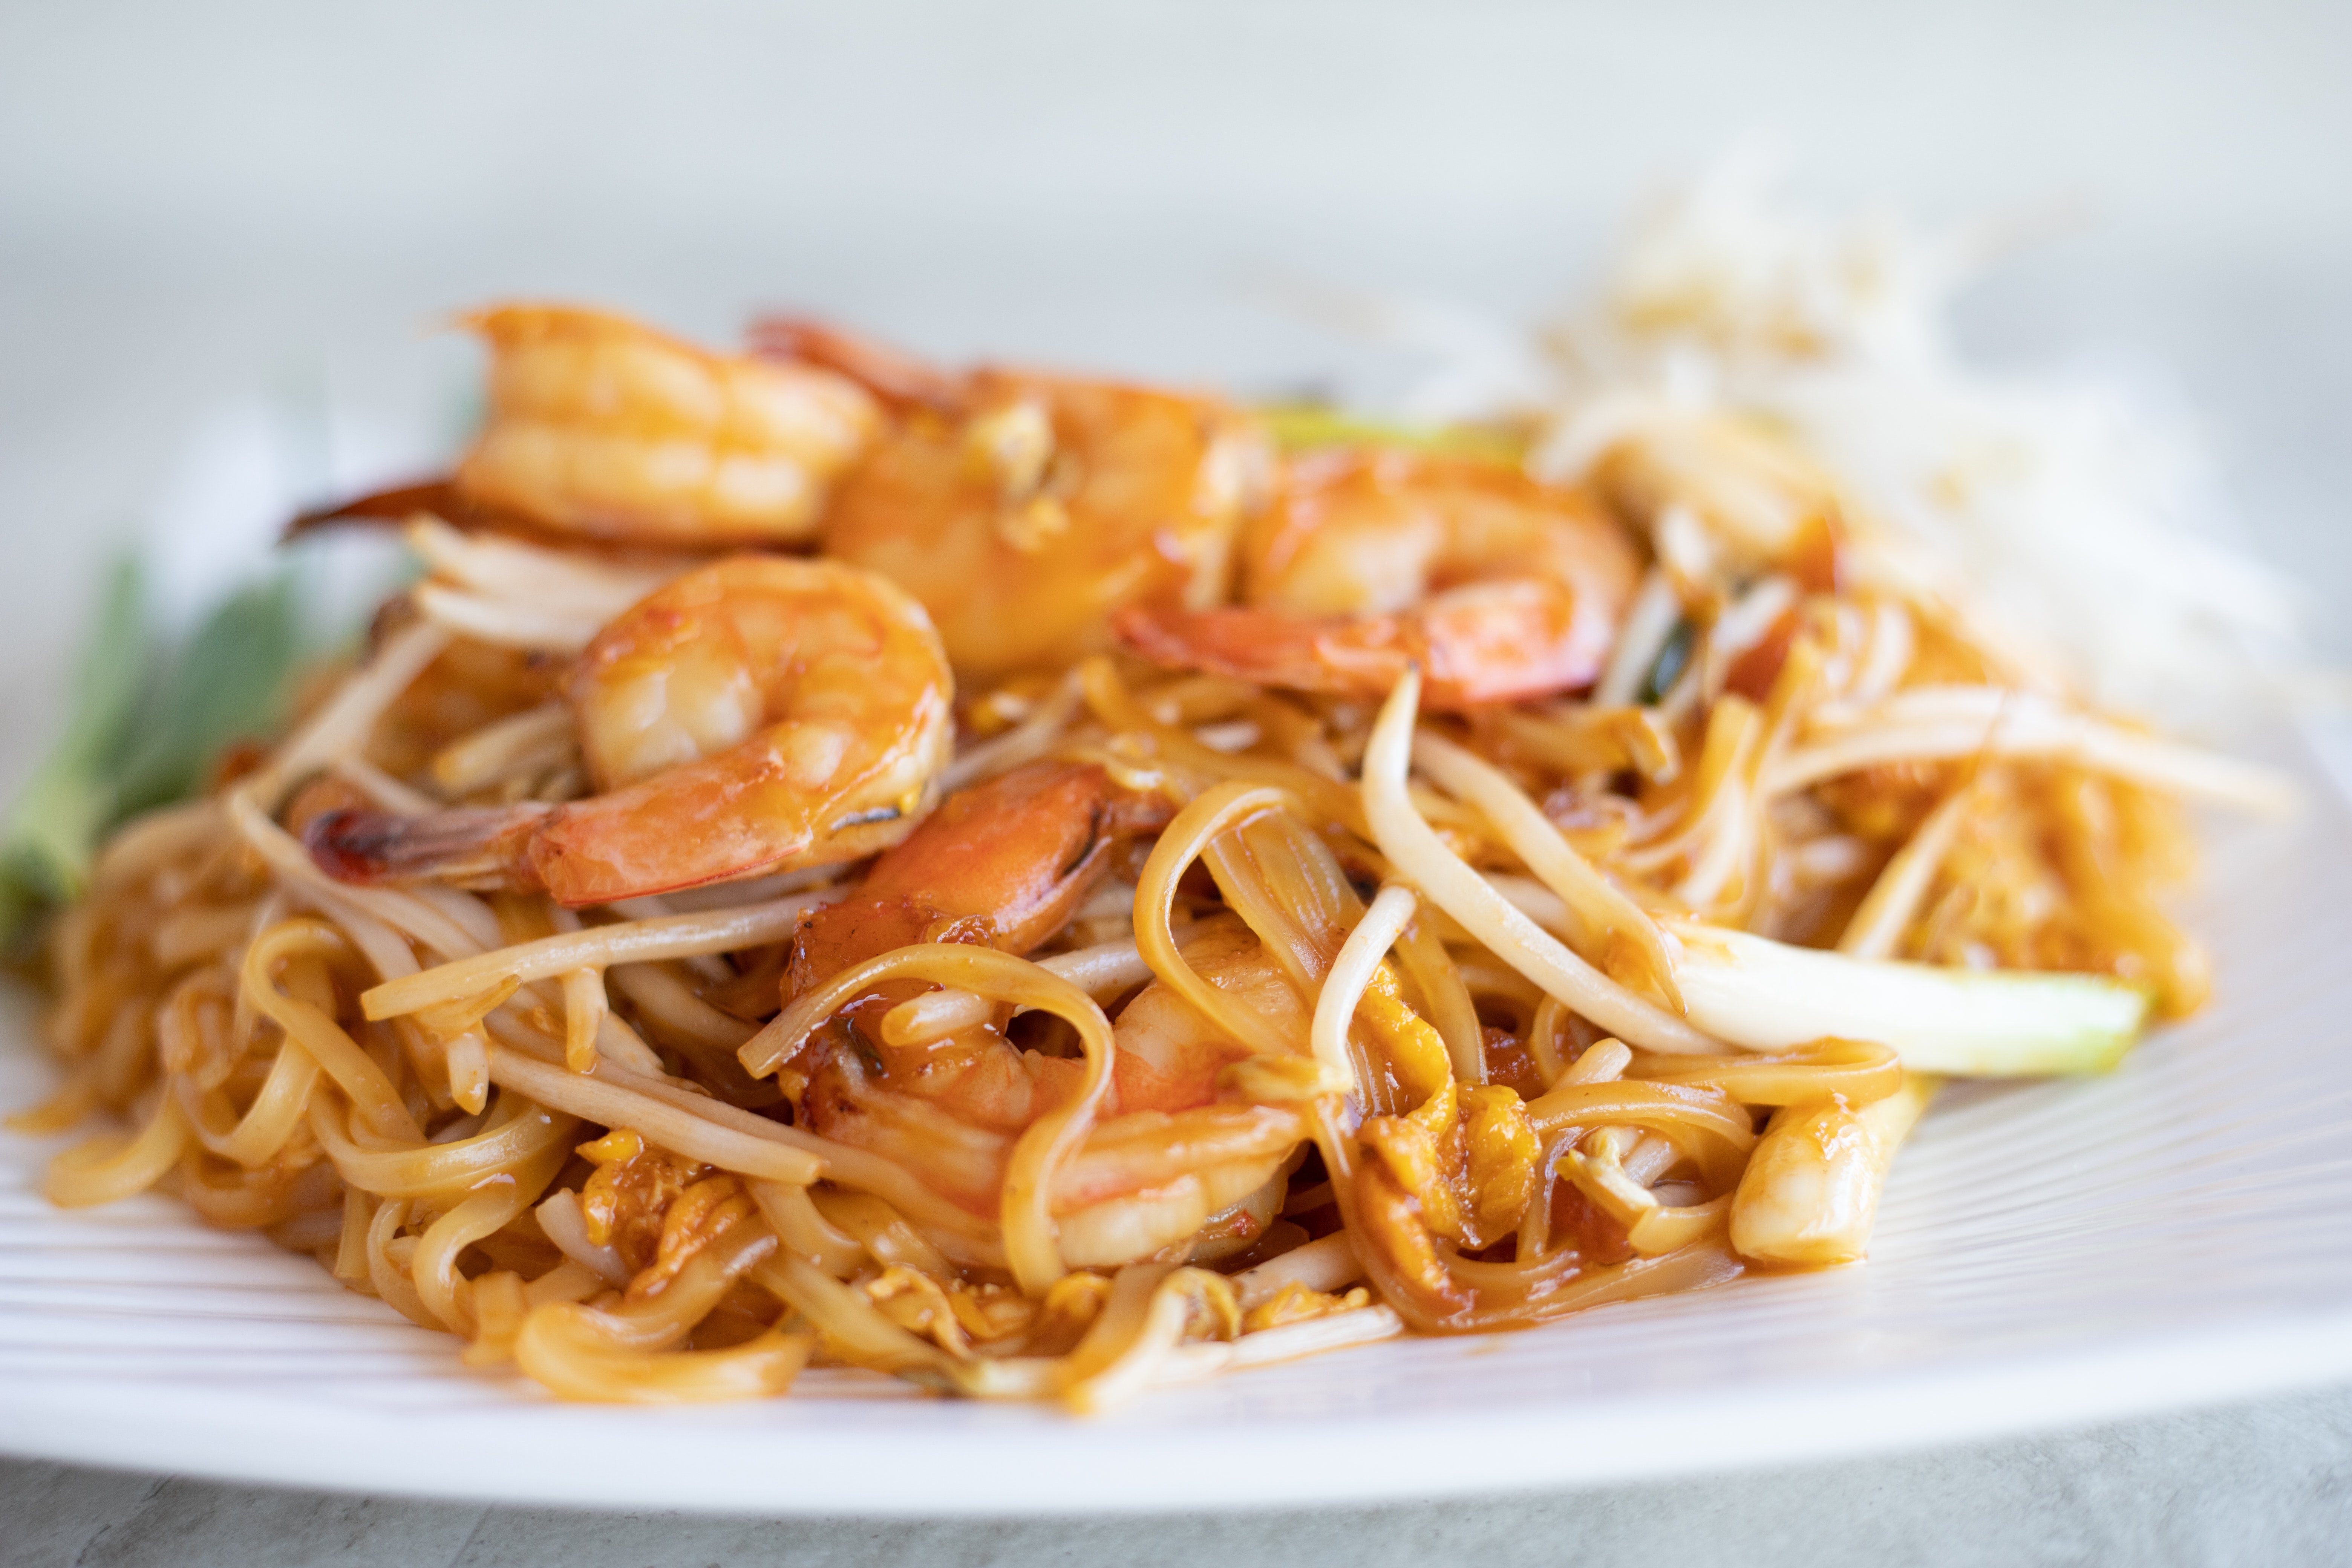